# **Song's Popularity Prediction**

----

Perusahaan Spotify dikembangkan pada tahun 2006 oleh tim di Spotify AB, di Stockholm, Swedia. Perusahaan ini didirikan oleh Daniel Ek, mantan CTO Stardoll, dan Martin Lorentzon, co-pendiri TradeDoubler. Spotify melakukan pendataan lagu-lagu hits yang dirilis setiap tahun dari 2000-2019. Data tersebut terdapat nilai popularitas yang diberikan oleh tim spotify. Bagaimana cara Spotify memberikan nilai popularitas? Apakah hanya bergantung pada berapa kali lagu tersebut diputar? Sayangnya tidak ada perhitungan berapa kali lagu-lagu tersebut diputar sejak pertama kali dirilis.

Pada data tersebut ada data-data teknis terkait suara yang dihasilkan oleh lagu-lagu hits. Penjelasannya sebagai berikut :

- artist    : Name of the Artist.<br>
- song      : Name of the Track.<br>
- duration_ms: Duration of the track in milliseconds.<br>
- explicit  : The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.<br>
- year      : Release Year of the track.<br>
- popularity : The higher the value the more popular the song is.<br>
- danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
- energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.<br>
- key : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.<br>
- loudness : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.<br>
- mode : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br>
- speechiness : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br>
- acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>
instrumentalness : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br>
- liveness : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>
- valence : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>
- tempo : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br>
- genre : Genre of the track.<br>

**Kita tahu kalau lagu hits biasanya karena nada dan musiknya yang pas di telinga dan selera kita. Apakah kamu yakin hanya karena nada dan musik saja? Terkadang suatu frekuensi suara, mood yang dibawa dalam lagu, tempo, dan hal-hal teknis lainnya yang mempengaruhi hits atau tidaknya suatu lagu. Bayangkan lagu ALL I ASK dari Adele dinyanyikan secara metal, apakah akan seterkenal sekarang? atau lagu Happy Birthday dibawakan dalam kunci Minor yang identik dengan nuansa gelap, apakah akan menyenangkan seseorang yang berulang tahun?**

**Di kesempatan kali ini telah dibuat sebuah model untuk memprediksi popularitas dari sebuah lagu berdasarkan data-data teknisnya. Data yang akan digunakan untuk model training adalah data lagu-lagu hits dari tahun 1998 sampai 2020. Tentu disini kita akan mengesampingkan terlebih dahulu soal nada dan musiknya. Apakah bisa kita memprediksi suatu lagu tanpa memperhitungkan nada dan musiknya?**

---------
--------


## Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import pickle
import ast

Import pustaka yang akan digunakan pada analisa dataset ini

----

## Data Loading

In [2]:
data = pd.read_csv('songs_normalize.csv')
df = data.copy()
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre1,genre2,genre3,genre4
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,NaN,NaN,NaN
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,pop,NaN,NaN
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,NaN,NaN,NaN
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock,metal,NaN,NaN
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,NaN,NaN,NaN


Load data dan menyimpan ke dalam variabel df

In [3]:
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre1,genre2,genre3,genre4
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,NaN,NaN,NaN
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,NaN,NaN,NaN
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0.1090,0.0669,0.000000,0.2740,0.811,97.984,hip hop,country,NaN,NaN
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,NaN,NaN,NaN
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,...,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop,NaN,NaN,NaN


----
## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Data bertipe object, int64, float64, dan bool. Jumlah row data 2000. Dataset mempunya nilai null pada kolom genre 2, genre 3, dan genre 4.

----

## **1. Apakah jumlah lagu setiap tahun sama?**

In [5]:
yearcount = (pd.DataFrame(df['year'].value_counts())).sort_index()
yearcount.reset_index(inplace=True)
yearcount.rename(columns={'year':'count','index':'year'}, inplace=True)
yearcount.head()

,year,count
0,1998,1
1,1999,38
2,2000,74
3,2001,108
4,2002,90


Grouping data berdasarkan tahun untuk melihat jumlah data setiap tahun

<AxesSubplot:xlabel='year', ylabel='count'>

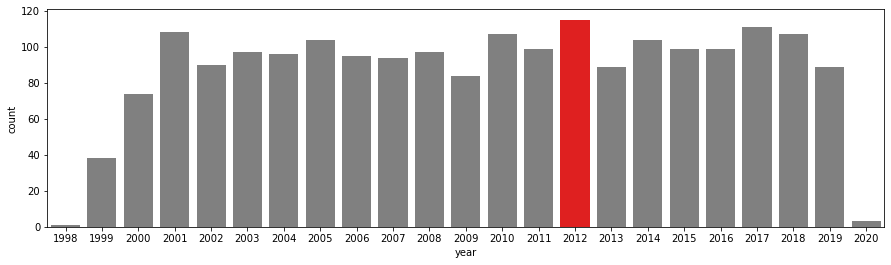

In [6]:
group1color = ['gray' if (x < max(yearcount['count'])) else 'red' for x in yearcount['count']]

plt.figure(figsize=(15,4))
sns.countplot(x='year', data=df, palette=group1color)

Berdasarkan hasil barplot diatas bisa kita lihat kalau tahun 2012 menjadi tahun dengan data terbanyak pada dataset ini, tahun 1998 dan 2020 terlihat anomali karena datanya sangat sedikit.

## **2. Bagaimana nilai popularitas di setiap tahun?**

[Text(0, 0, '49'),
 Text(0, 0, '64.9211'),
 Text(0, 0, '58.5541'),
 Text(0, 0, '59.4074'),
 Text(0, 0, '62.4'),
 Text(0, 0, '58.7938'),
 Text(0, 0, '58.4271'),
 Text(0, 0, '61.7596'),
 Text(0, 0, '57.3895'),
 Text(0, 0, '59.9255'),
 Text(0, 0, '63.7216'),
 Text(0, 0, '61.5357'),
 Text(0, 0, '60.7477'),
 Text(0, 0, '58.5657'),
 Text(0, 0, '60.5565'),
 Text(0, 0, '54.7865'),
 Text(0, 0, '59.3846'),
 Text(0, 0, '57.7475'),
 Text(0, 0, '54.1717'),
 Text(0, 0, '53.8829'),
 Text(0, 0, '70.8505'),
 Text(0, 0, '63.0112'),
 Text(0, 0, '43.3333')]

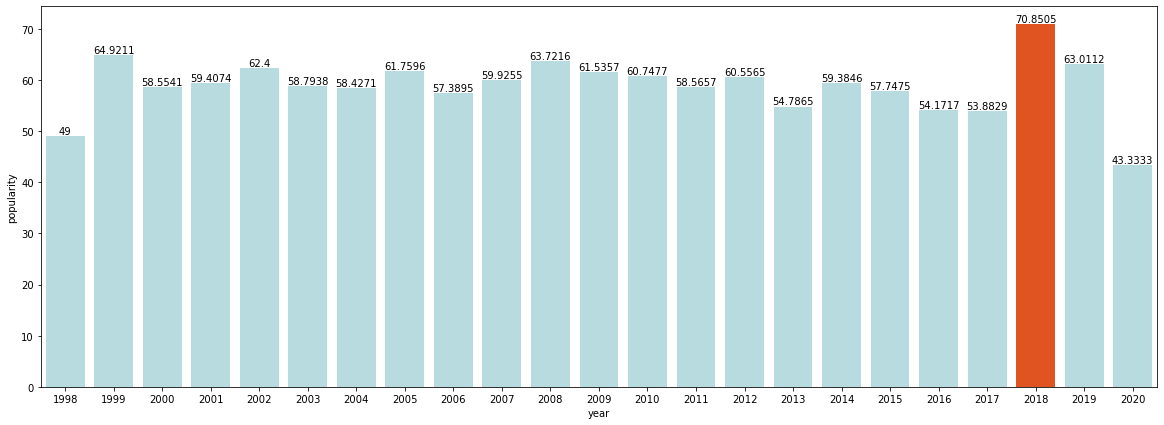

In [7]:
popurat = df.groupby('year')['popularity'].mean()
group2color = ['powderblue' if (x < max(popurat)) else 'orangered' for x in popurat]

plt.figure(figsize=(20,7))
a1 = sns.barplot(x=popurat.index, y=popurat,palette=group2color)
a1.bar_label(a1.containers[0])

Walaupun tadi tahun 2012 adalah penyumbang data terbanyak, ternyata tahun 2018 mempunyai rata-rata kepopuleran tertinggi dari tahun 1998 sampai 2020. Sepertinya tahun 2018 adalah tahun kebangkitan dunia musik dimana sejak 2008 grafiknya cenderung turun.

## **3. Lagu Populer berdurasi berapa lama?**

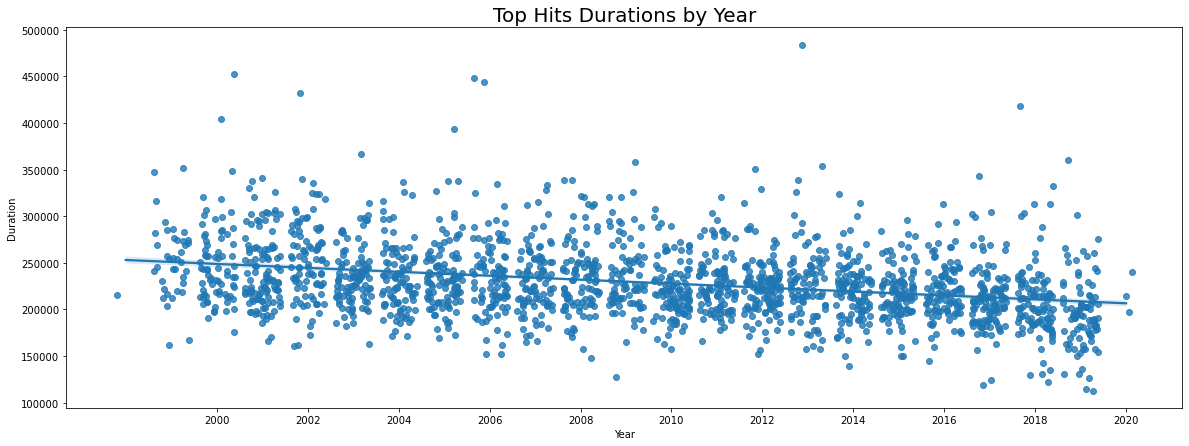

In [8]:
# Year vs duration_s
plt.figure(figsize=(20,7))
ax = sns.regplot(x="year", y="duration_ms", data=df, x_jitter=.4)
ax.set_title("Top Hits Durations by Year", fontsize=20)
ax.set_ylabel("Duration")
ax.set_xlabel("Year")
ax.set_xticks(np.arange(2000, 2021, 2))

Berdasarkan scatterplot, durasi lagu-lagu populer itu berada pada durasi 17000-25000ms atau 3-4 menit. Bisa kita lihat kalau dari tahun-tahun durasi dari lagu populer turun trendnya.

## **4. Kunci nada apa yang banyak digunakan pada lagu-lagu populer?**

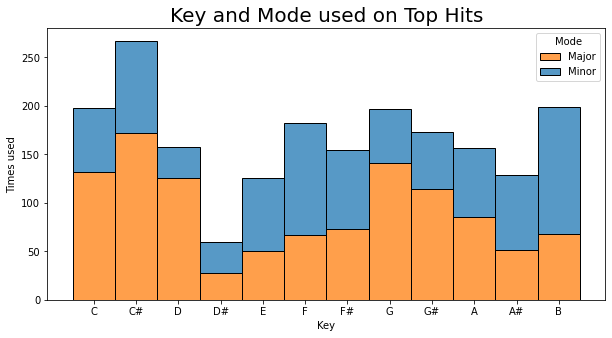

In [9]:
#Key and mode distribution
key_names = 'C C# D D# E F F# G G# A A# B'.split()
key_values = np.arange(0, 12, 1)
key_map = dict(zip(key_values, key_names))
df["key_name"] = df["key"].map(key_map)
df["key_name"] = pd.Categorical(df["key_name"], key_names)
#Plot
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.histplot(x="key_name", hue="mode", multiple="stack",
                  data=df, legend=False)
ax.set_title("Key and Mode used on Top Hits", fontsize=20)
ax.set_ylabel("Times used")
ax.set_xlabel("Key")
ax.set_xticks(key_names)
plt.legend(title='Mode', labels=['Major', 'Minor'])

Kunci-kunci nada dasar yaitu C C♯ D D♯ E F F♯ G G♯ A A♯ B. Pada dataset, kunci C# adalah kunci dasar yang paling banyak digunakan khususnya untuk model Major. Untuk mode minor paling banyak menggunakan kunci dasar B.

In [10]:
keybase = df.groupby('key_name')['popularity'].mean()
keybase = pd.DataFrame(keybase)
keybase.reset_index(inplace=True)
keybase

,key_name,popularity
0,C,58.434343
1,C#,60.625468
2,D,57.177215
3,D#,63.600000
4,E,61.103175
5,F,59.043956
6,F#,58.629870
7,G,60.045685
8,G#,62.092486
9,A,61.057325


Membuat dataframe untuk key_name dan popularity.

[Text(0, 0, '58.4343'),
 Text(0, 0, '60.6255'),
 Text(0, 0, '57.1772'),
 Text(0, 0, '63.6'),
 Text(0, 0, '61.1032'),
 Text(0, 0, '59.044'),
 Text(0, 0, '58.6299'),
 Text(0, 0, '60.0457'),
 Text(0, 0, '62.0925'),
 Text(0, 0, '61.0573'),
 Text(0, 0, '59.8372'),
 Text(0, 0, '59.2362')]

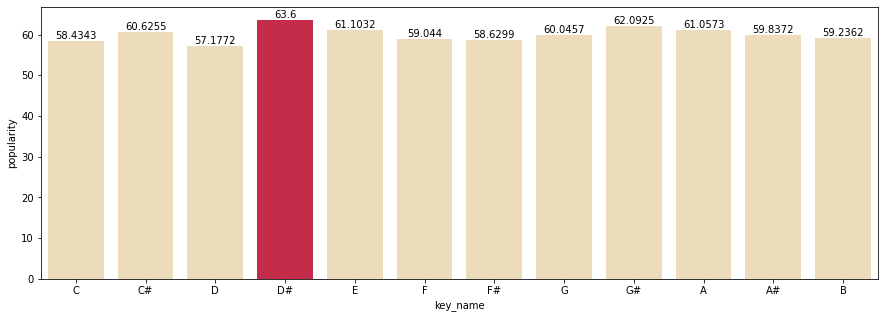

In [11]:
group3color = ['wheat' if (x < max(keybase['popularity'])) else 'crimson' for x in keybase['popularity']]
plt.figure(figsize=(15,5))
a2 =sns.barplot(x='key_name',y='popularity', data=keybase, palette=group3color)
a2.bar_label(a2.containers[0])

Popularitas berdasarkan kunci dasar cenderung sama nilainya tidak ada yang jauh signifikan perbedaannya. Kunci dasar terpopuler adalah D# dan yang paling rendah adalah D.

<AxesSubplot:>

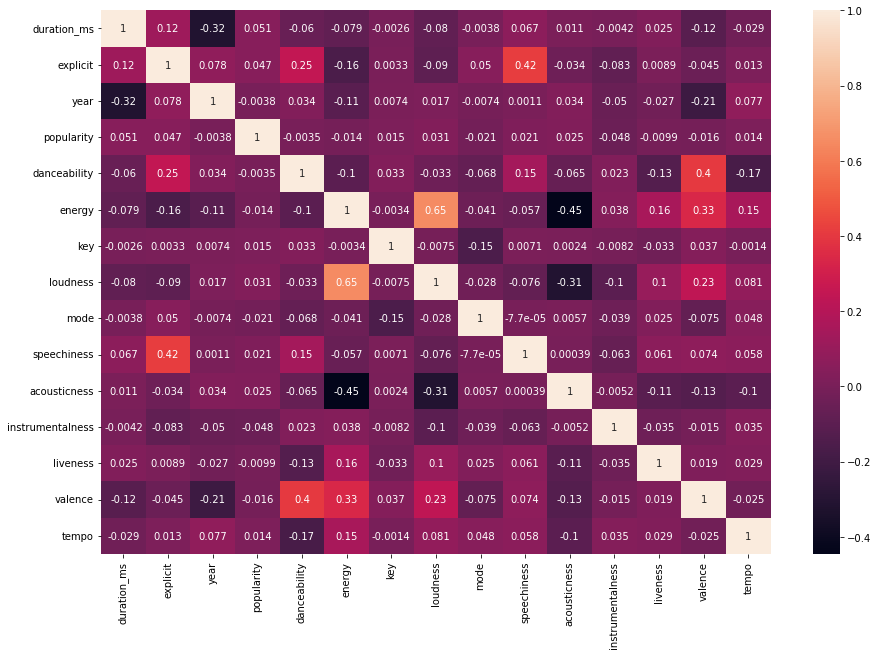

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Dari korelasi tiap kolom diatas kebanyakan kolom kurang berkorelasi. Kolom energy dan loudness menjadi kolom yang paling berkorelasi positif.

## **Bagaimana range angka pada data-data numerikal?**

In [13]:
num = ['duration_ms', 'year', 'danceability', 'energy', 'loudness',
        'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo']

for i in num:
        print('Nilai Minimal dari',i,'=',df[i].min())
        print('Nilai Maximal dari',i,'=',df[i].max())
        print('Range dari',i,'=',df[i].max()-df[i].min())
        print('------------------------------------------------------')

Nilai Minimal dari duration_ms = 113000
Nilai Maximal dari duration_ms = 484146
Range dari duration_ms = 371146
------------------------------------------------------
Nilai Minimal dari year = 1998
Nilai Maximal dari year = 2020
Range dari year = 22
------------------------------------------------------
Nilai Minimal dari danceability = 0.129
Nilai Maximal dari danceability = 0.975
Range dari danceability = 0.846
------------------------------------------------------
Nilai Minimal dari energy = 0.0549
Nilai Maximal dari energy = 0.999
Range dari energy = 0.9441
------------------------------------------------------
Nilai Minimal dari loudness = -20.514
Nilai Maximal dari loudness = -0.276
Range dari loudness = 20.238
------------------------------------------------------
Nilai Minimal dari mode = 0
Nilai Maximal dari mode = 1
Range dari mode = 1
------------------------------------------------------
Nilai Minimal dari speechiness = 0.0232
Nilai Maximal dari speechiness = 0.576
Range da

Berikut adalah hasil perhitungan nilai min, max, dan range setiap kolom. Untuk kolom yang bersifat float kebanyakan adalah nilai 1, diasumsikan kalau 1 adalah niai terbaik.

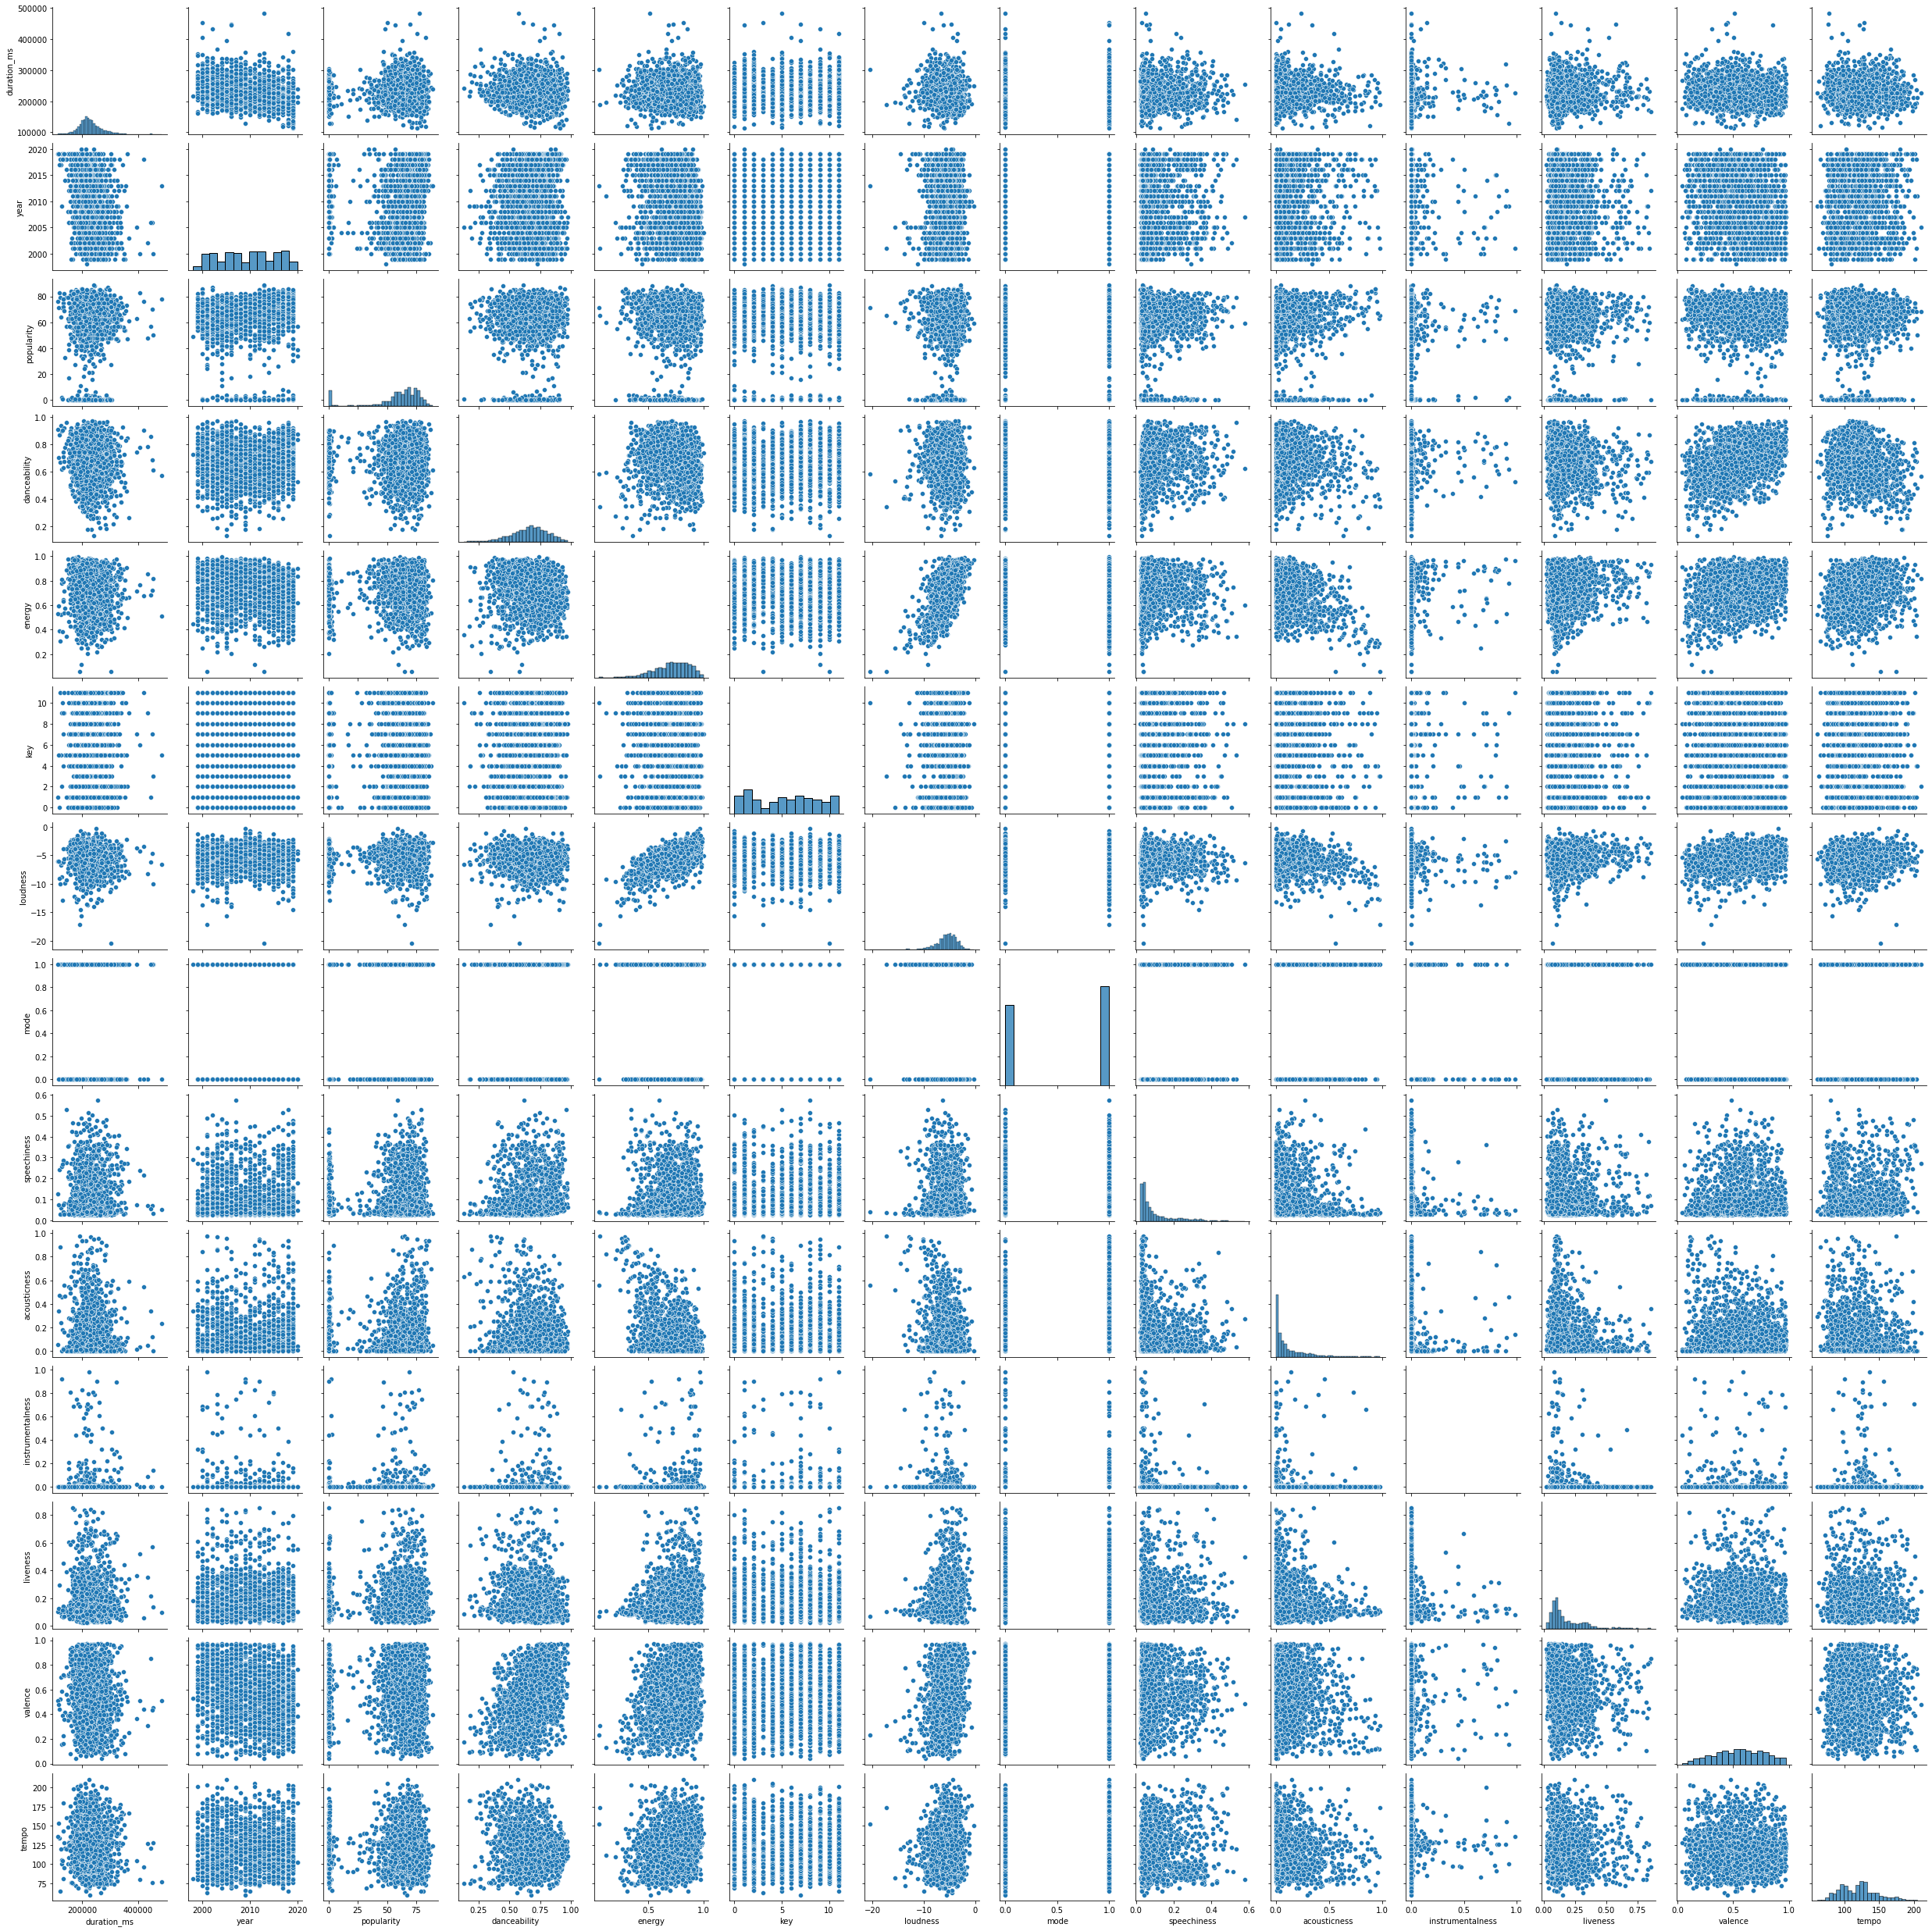

In [14]:
sns.pairplot(df.drop(columns=['explicit']))

Pairplot diatas untuk melihat sebaran antar kolom dan juga sebaran data masing-masing kolom. Beberapa kolom terlihat cukup berkorelasi seperti loudness dan energy seperti pada hasil heatmap sebelumnya.

In [15]:
num_col = df.select_dtypes(include=['int64','float64']).copy()
cat_col = df.select_dtypes(include=['object','bool']).copy()

num_col

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


Memisahkan data numerik dan kategorik untuk melihat lebih detail di cell selanjutnya

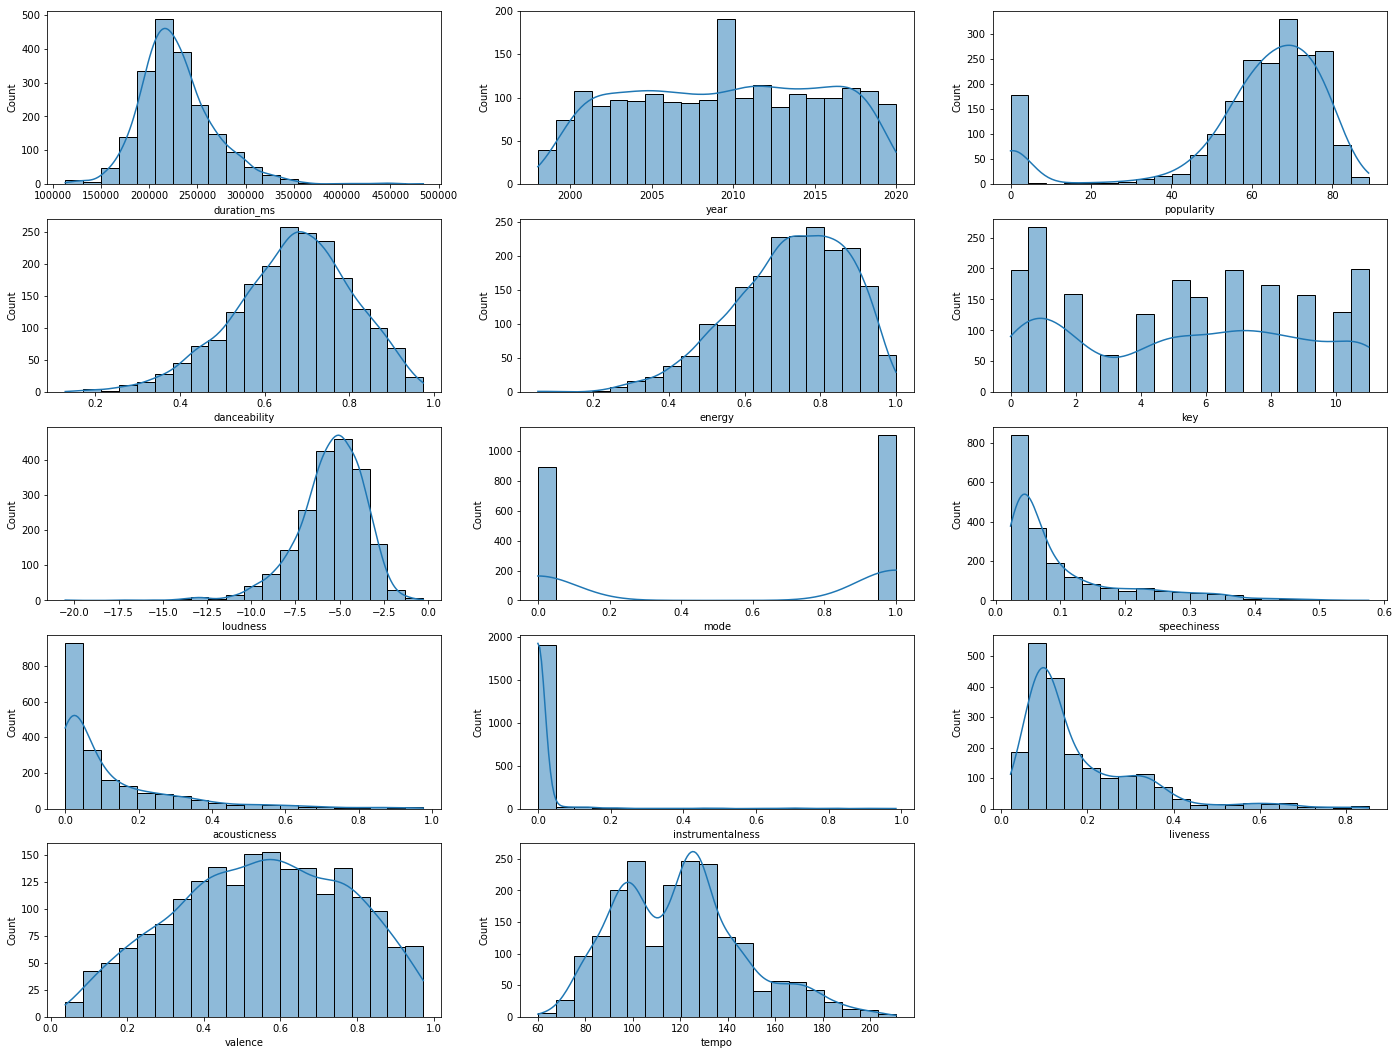

In [16]:
plt.figure(figsize=(24,30))

for i, col in enumerate(list(num_col.columns)):
    i += 1
    plt.subplot(8,3,i)
    sns.histplot(data = num_col, x = num_col[col], bins = 20,
                 kde = True)


Plot diatas adalah untuk melihat sebaran data setiap kolom, misal pada kolom liveness dan speechness sebarannya right skewed. Kebanyakan dari kolom-kolom dataset tidak terlalu besar kemiringannya.
Untuk energy lagu-lagu banyak yang tergolong berenergi tinggi di nilai 0.8 dari 1.0.

----
## DATA PREPROCESSING

In [17]:
df.drop(columns=['artist','song','key'],inplace=True)

Setelah sebelumnya ada penambahan kolom key_name untuk mengdefinisikan kolom key, ada beberapa kolom (artist dan song) yang dihapus karena sifatnya terlalu unik dan bisa dihapus dalam pemodelan.

### a. Inference

In [18]:
# get data for model inference
df_inf = df.sample(10, random_state=42)
df_inf

,duration_ms,explicit,year,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre1,genre2,genre3,genre4,key_name
1860,200853,False,2018,72,0.845,0.561,-5.253,0,0.0778,0.211000,0.000003,0.0383,0.811,109.974,pop,NaN,NaN,NaN,C#
353,224440,True,2003,72,0.646,0.813,-3.846,0,0.2990,0.349000,0.000094,0.0427,0.895,92.729,hip hop,pop,NaN,NaN,F#
1333,223800,False,2012,60,0.693,0.822,-5.441,0,0.0439,0.006160,0.000002,0.3150,0.763,126.035,hip hop,pop,NaN,NaN,E
905,236266,False,2008,74,0.617,0.741,-3.970,1,0.0311,0.131000,0.000000,0.0772,0.306,118.984,pop,NaN,NaN,NaN,D
1289,181573,True,2011,74,0.766,0.442,-8.558,1,0.3560,0.000107,0.000061,0.1110,0.390,201.800,hip hop,pop,R&B,NaN,C#
1273,199986,False,2012,82,0.726,0.787,-2.494,1,0.0737,0.009000,0.000000,0.0596,0.888,124.990,pop,NaN,NaN,NaN,E
938,212106,False,2009,3,0.657,0.695,-4.493,1,0.0321,0.010800,0.000000,0.0822,0.683,65.997,hip hop,pop,R&B,NaN,D
1731,177184,True,2016,76,0.886,0.427,-10.028,1,0.1450,0.031200,0.000990,0.0906,0.230,108.034,hip hop,NaN,NaN,NaN,F#
65,273533,False,2000,58,0.631,0.734,-7.480,0,0.0360,0.348000,0.000000,0.1350,0.591,124.036,pop,NaN,NaN,NaN,F
1323,221272,False,2013,68,0.485,0.724,-4.633,0,0.0521,0.073600,0.000000,0.0631,0.433,128.045,pop,Dance/Electronic,NaN,NaN,A


Mengambil 10 data inference untuk nantinya diuji coba terhadap model yang sudah dibuat.

In [19]:
df_train_test = df.drop(df_inf.index)
df_train_test

,duration_ms,explicit,year,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre1,genre2,genre3,genre4,key_name
0,211160,False,2000,77,0.751,0.834,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,NaN,NaN,NaN,C#
1,167066,False,1999,79,0.434,0.897,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,pop,NaN,NaN,C
2,250546,False,1999,66,0.529,0.496,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,NaN,NaN,NaN,G
3,224493,False,2000,78,0.551,0.913,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock,metal,NaN,NaN,C
4,200560,False,2000,65,0.614,0.928,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,NaN,NaN,NaN,G#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,False,2019,79,0.842,0.734,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,NaN,NaN,NaN,C#
1996,178426,False,2019,78,0.552,0.702,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,NaN,NaN,NaN,A
1997,200593,False,2019,69,0.847,0.678,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,hip hop,country,NaN,NaN,A
1998,171029,False,2019,75,0.741,0.520,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,NaN,NaN,NaN,G#


Data yang telah dipisahkan dari 10 data inference disimpan dalam variabel df_train_test

In [20]:
# reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,duration_ms,explicit,year,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre1,genre2,genre3,genre4,key_name
0,200853,False,2018,72,0.845,0.561,-5.253,0,0.0778,0.211000,0.000003,0.0383,0.811,109.974,pop,NaN,NaN,NaN,C#
1,224440,True,2003,72,0.646,0.813,-3.846,0,0.2990,0.349000,0.000094,0.0427,0.895,92.729,hip hop,pop,NaN,NaN,F#
2,223800,False,2012,60,0.693,0.822,-5.441,0,0.0439,0.006160,0.000002,0.3150,0.763,126.035,hip hop,pop,NaN,NaN,E
3,236266,False,2008,74,0.617,0.741,-3.970,1,0.0311,0.131000,0.000000,0.0772,0.306,118.984,pop,NaN,NaN,NaN,D
4,181573,True,2011,74,0.766,0.442,-8.558,1,0.3560,0.000107,0.000061,0.1110,0.390,201.800,hip hop,pop,R&B,NaN,C#
5,199986,False,2012,82,0.726,0.787,-2.494,1,0.0737,0.009000,0.000000,0.0596,0.888,124.990,pop,NaN,NaN,NaN,E
6,212106,False,2009,3,0.657,0.695,-4.493,1,0.0321,0.010800,0.000000,0.0822,0.683,65.997,hip hop,pop,R&B,NaN,D
7,177184,True,2016,76,0.886,0.427,-10.028,1,0.1450,0.031200,0.000990,0.0906,0.230,108.034,hip hop,NaN,NaN,NaN,F#
8,273533,False,2000,58,0.631,0.734,-7.480,0,0.0360,0.348000,0.000000,0.1350,0.591,124.036,pop,NaN,NaN,NaN,F
9,221272,False,2013,68,0.485,0.724,-4.633,0,0.0521,0.073600,0.000000,0.0631,0.433,128.045,pop,Dance/Electronic,NaN,NaN,A


Cell diatas untuk reset index dari kedua dataset yang telah dipisahkan.

### b. Splitting Data

In [21]:
# Split between `X` (Features) and `y` (Target)
X = df_train_test.drop('popularity',axis=1)
y = df_train_test['popularity']
X

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre1,genre2,genre3,genre4,key_name
0,211160,False,2000,0.751,0.834,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,NaN,NaN,NaN,C#
1,167066,False,1999,0.434,0.897,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,pop,NaN,NaN,C
2,250546,False,1999,0.529,0.496,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,NaN,NaN,NaN,G
3,224493,False,2000,0.551,0.913,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock,metal,NaN,NaN,C
4,200560,False,2000,0.614,0.928,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,NaN,NaN,NaN,G#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,181026,False,2019,0.842,0.734,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,NaN,NaN,NaN,C#
1986,178426,False,2019,0.552,0.702,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,NaN,NaN,NaN,A
1987,200593,False,2019,0.847,0.678,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,hip hop,country,NaN,NaN,A
1988,171029,False,2019,0.741,0.520,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,NaN,NaN,NaN,G#


Memisahkan data fitur dan target (popularity) yang akan dimodelkan nanti

In [22]:
# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train Size =', X_train.shape)
print('X_test Size  =', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_train Size = (1592, 18)
X_test Size  = (398, 18)
y_train Size = (1592,)
y_test Size  = (398,)


Splitting data X dan y ke Train-Test set, lalu diperiksa shapenya

### c. Handling Missing Values

In [23]:
X_train.isnull().sum()

duration_ms            0
explicit               0
year                   0
danceability           0
energy                 0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
genre1                 0
genre2               587
genre3              1267
genre4              1585
key_name               0
dtype: int64

Masih ada missing values di genre2, genre3, dan genre4.

In [24]:
X_train.fillna({'genre2':'none','genre3':'none','genre4':'none'}, inplace=True)

Mengisi missing value dengan 'none'

In [25]:
X_train.isnull().sum()

duration_ms         0
explicit            0
year                0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre1              0
genre2              0
genre3              0
genre4              0
key_name            0
dtype: int64

Sudah tidak ada missing value di X_train

In [26]:
X_test.isnull().sum()

duration_ms           0
explicit              0
year                  0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
genre1                0
genre2              134
genre3              310
genre4              397
key_name              0
dtype: int64

Masih ada missing values juga di genre2, genre3, dan genre4 untuk X_test.

In [27]:
X_test.fillna({'genre2':'none','genre3':'none','genre4':'none'}, inplace=True)

Mengisi missing value dengan 'none'

In [28]:
X_test.isnull().sum()

duration_ms         0
explicit            0
year                0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre1              0
genre2              0
genre3              0
genre4              0
key_name            0
dtype: int64

Sudah tidak ada missing value di X_test

### d. Handling Outliers


In [29]:
num_col2 = num_col.drop(['duration_ms','tempo','popularity','year'],axis=1)

Membuat variabel num_col2 dengan beberapa kolom yang didrop

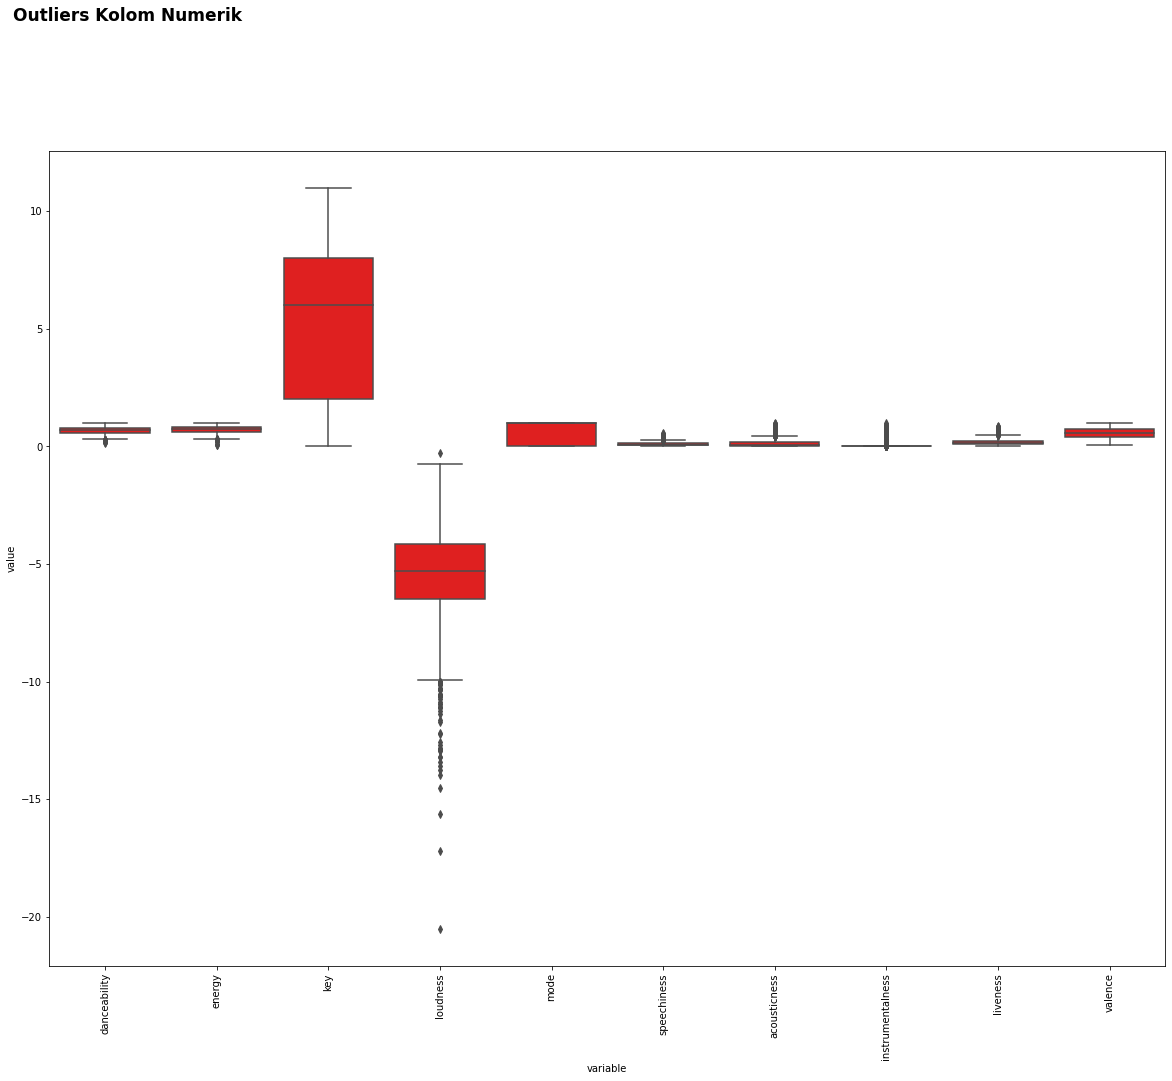

In [30]:
numeric = data[[feature for feature in num_col2 if feature not in []]]
numericmelt = numeric.melt()
plt.figure(figsize=(20,15))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontsize=17, fontweight='bold')
box = sns.boxplot(x='variable', y='value', data=numericmelt, palette=['r']*len(num_col2))
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

Berdasarkan barplot diatas masih ada outlier pada dataset.

In [31]:
df.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_6392/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


duration_ms         1.018925
explicit            1.005755
year               -0.046205
popularity         -1.824422
danceability       -0.428030
energy             -0.632896
loudness           -1.199866
mode               -0.215397
speechiness         1.761877
acousticness        2.094134
instrumentalness    7.581736
liveness            1.848579
valence            -0.128816
tempo               0.546770
dtype: float64

Berdasarkan hasil analisis melihat boxplot dan nilai skewness, data tersebut memang masih ada outliers, tapi data pada lagu-lagu populer ini dianggap natural begitu adanya. Maka akan diputuskan untuk tidak handle outliers.

### e. Feature Selection

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 240 to 1126
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   duration_ms       1592 non-null   int64   
 1   explicit          1592 non-null   bool    
 2   year              1592 non-null   int64   
 3   danceability      1592 non-null   float64 
 4   energy            1592 non-null   float64 
 5   loudness          1592 non-null   float64 
 6   mode              1592 non-null   int64   
 7   speechiness       1592 non-null   float64 
 8   acousticness      1592 non-null   float64 
 9   instrumentalness  1592 non-null   float64 
 10  liveness          1592 non-null   float64 
 11  valence           1592 non-null   float64 
 12  tempo             1592 non-null   float64 
 13  genre1            1592 non-null   object  
 14  genre2            1592 non-null   object  
 15  genre3            1592 non-null   object  
 16  genre4            1592

In [33]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object','bool','category']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['duration_ms', 'year', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Categorical Columns :  ['explicit', 'genre1', 'genre2', 'genre3', 'genre4', 'key_name']


Memisahkan data berdasarkan kolom numerik dan kategorik

### f. Scaling

In [34]:
print('X_train skewness =\n',X_train.skew())
print('X_test skewness =\n',X_test.skew())

X_train skewness =
 duration_ms         0.996927
explicit            0.997495
year               -0.034664
danceability       -0.448754
energy             -0.615560
loudness           -1.248179
mode               -0.222679
speechiness         1.777171
acousticness        2.029490
instrumentalness    7.533215
liveness            1.815582
valence            -0.120306
tempo               0.543957
dtype: float64
X_test skewness =
 duration_ms         1.102404
explicit            1.046697
year               -0.082394
danceability       -0.342466
energy             -0.709047
loudness           -0.946530
mode               -0.192558
speechiness         1.694984
acousticness        2.404214
instrumentalness    6.598240
liveness            1.984064
valence            -0.165264
tempo               0.531713
dtype: float64


C:\Users\DELL\AppData\Local\Temp/ipykernel_6392/3996075523.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('X_train skewness =\n',X_train.skew())
C:\Users\DELL\AppData\Local\Temp/ipykernel_6392/3996075523.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('X_test skewness =\n',X_test.skew())


Data cenderung skewed dengan variasi ada yang >0.5 dan <0.5 maka akan menggunakan MinMaxScaler

In [35]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', MinMaxScaler())])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

Penggunaan OneHotEncoder karena data categorical bersifat nominal

In [36]:
preprocessor =  ColumnTransformer([
    ('numeric', num_pipeline,['duration_ms', 'year', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']),
    ('category', cat_pipeline,['explicit', 'genre1', 'genre2', 'genre3', 'genre4','key_name'])
])

ColumnTransformer untuk pengolahan handling missing value berdasarkan kategori dalam pipeline

## MODEL TRAINING

----

## 1. Logistic Regression

In [37]:
pipeline_linreg = Pipeline([('prepro',preprocessor),('linreg',LinearRegression(),)])

Pembuatan model pipeline regresi linier dengan memasukkan proses preprocessing yang sebelumnya telah dibuat dan menggunakan hyperparameter default.

In [38]:
pipeline_linreg.fit(X_train,y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration_ms', 'year',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                        

Cell diatas adalah proses fit dengan model regresi linier terhadap X_train dan y_train.

## 2. Linear SVR

In [39]:
pipeline_svr = Pipeline([('prep',preprocessor),('svr',LinearSVR())])

Pembuatan model pipeline svr dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [40]:
pipeline_svr.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration_ms', 'year',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                          

Pembuatan model pipeline SVR dengan memasukkan proses preprocessing yang sebelumnya telah dibuat dan menggunakan hyperparameter default.

In [41]:
pipeline_svr.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration_ms', 'year',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                          

Cell diatas adalah proses fit dengan model SVR terhadap X_train dan y_train.

## 3. Random Forest

In [42]:
pipeline_rf = Pipeline([('prep',preprocessor),('rf',RandomForestRegressor())])

Pembuatan model pipeline svr dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [43]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration_ms', 'year',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                          

Pembuatan model pipeline regresi logistik dengan memasukkan proses preprocessing yang sebelumnya telah dibuat dan menggunakan hyperparameter default.

Cell diatas adalah proses fit dengan model regresi logistik terhadap X_train dan y_train.

## 4. Gradient Boost

In [44]:
pipeline_gb = Pipeline([('prep',preprocessor),('gb',GradientBoostingRegressor())])

Pembuatan model pipeline Gradient Boost dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [45]:
pipeline_gb.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration_ms', 'year',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                          

Pembuatan model pipeline Gradient Boost dengan memasukkan proses preprocessing yang sebelumnya telah dibuat dan menggunakan hyperparameter default.

----

## MODEL EVALUATION

## > Linear Regression

In [46]:
y_pred_train = pipeline_linreg.predict(X_train)
y_pred_test = pipeline_linreg.predict(X_test)

y_pred_test

array([63.6240883 , 60.30458814, 69.6212702 , 72.42081816, 53.26889557,
       57.57305815, 56.12511685, 53.6089677 , 69.36806817, 61.46253778,
       65.81805779, 62.9199612 , 60.56781583, 53.63428517, 67.69703457,
       56.89295195, 62.39115457, 60.18630149, 62.46025603, 56.7994707 ,
       61.91387905, 63.0358501 , 56.75976413, 54.69690994, 56.11005622,
       59.53141427, 55.227403  , 61.3098647 , 61.51830075, 65.80279426,
       64.35863966, 60.9690421 , 55.39929822, 51.98735599, 55.94706601,
       57.51794573, 57.24101887, 55.99100902, 63.2170242 , 59.2207144 ,
       57.49684726, 56.80352439, 54.86257923, 61.012268  , 58.83334982,
       55.17114928, 56.95840144, 58.82593739, 66.0953022 , 52.20963185,
       57.65041987, 58.73004448, 68.24898272, 55.46357258, 57.6633259 ,
       45.16991204, 63.08928216, 53.05685287, 46.91129946, 64.0020287 ,
       64.17376294, 46.98127385, 79.34757667, 58.32586585, 66.17765222,
       59.9941627 , 52.58072872, 65.90230313, 56.12036191, 62.31

Model Regresi Linier yang telah dilatih pada data feature dicoba untuk prediksi popularitas di y_train dan y_test

In [47]:
# Evaluate Model using MAE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE Train-Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_test))
print('')
print('MSE Train-Set : ', mean_squared_error(y_train, y_pred_train))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_test))
print('')
print('RMSE Train-Set : ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('')
print('r2score Train-Set : ', r2_score(y_train, y_pred_train))
print('r2score Test-Set  : ', r2_score(y_test, y_pred_test))

print('\nAverage Price :',df['popularity'].mean())

MAE Train-Set :  13.9472056824467
MAE Test-Set  :  14.75744647007785

MSE Train-Set :  423.47498811637524
MSE Test-Set  :  466.5839036460833

RMSE Train-Set :  20.578507917640074
RMSE Test-Set  :  21.60055331805376

r2score Train-Set :  0.05601858641163504
r2score Test-Set  :  0.027218073905791118

Average Price : 59.8725


In [48]:
13.97046021121231/59.8725*100

23.33368443143732

Berdasarkan R2Score didapati kalau model regresi linier cukup fit pada data test karena nilai pada data train dan data test hampir sama. Namun hasil prediksi mempunyai nilai error yang cukup besar yaitu 23.33 %

## > SVR

In [49]:
y_pred_svr_train = pipeline_svr.predict(X_train)
y_pred_svr_test = pipeline_svr.predict(X_test)

Model SVR yang telah dilatih pada data feature dicoba untuk prediksi popularitas di y_train dan y_test

In [50]:
# Evaluate Model using MAE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE Train-Set : ', mean_absolute_error(y_train, y_pred_svr_train))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_svr_test))
print('')
print('MSE Train-Set : ', mean_squared_error(y_train, y_pred_svr_train))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_svr_test))
print('')
print('RMSE Train-Set : ', np.sqrt(mean_squared_error(y_train, y_pred_svr_train)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('')
print('r2score Train-Set : ', r2_score(y_train, y_pred_svr_train))
print('r2score Test-Set  : ', r2_score(y_test, y_pred_svr_test))

print('\nAverage Price :',df['popularity'].mean())

MAE Train-Set :  12.675547748897747
MAE Test-Set  :  13.244621038073568

MSE Train-Set :  478.0750456780791
MSE Test-Set  :  506.10333641383437

RMSE Train-Set :  21.86492729642793
RMSE Test-Set  :  22.49674057311046

r2score Train-Set :  -0.06569211897939775
r2score Test-Set  :  -0.05517608848504052

Average Price : 59.8725


In [51]:
12.703097285509516/59.8725*100

21.21691475303272

Berdasarkan R2Score didapati kalau model SVR cukup fit pada data test karena nilai pada data train dan data test tidak terlalu jauh. Namun hasil prediksi mempunyai nilai error yang cukup besar yaitu 21.21 %

## > Random Forest Regression

In [52]:
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

Model Random Forest yang telah dilatih pada data feature dicoba untuk prediksi popularitas di y_train dan y_test

In [53]:
# Evaluate Model using MAE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE Train-Set : ', mean_absolute_error(y_train, y_pred_train_rf))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_test_rf))
print('')
print('MSE Train-Set : ', mean_squared_error(y_train, y_pred_train_rf))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_test_rf))
print('')
print('RMSE Train-Set : ', np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))
print('')
print('r2score Train-Set : ', r2_score(y_train, y_pred_train_rf))
print('r2score Test-Set  : ', r2_score(y_test, y_pred_test_rf))

print('\nAverage Price :',df['popularity'].mean())

MAE Train-Set :  5.487811557788945
MAE Test-Set  :  14.803417504187605

MSE Train-Set :  64.18931403690647
MSE Test-Set  :  467.1064894341848

RMSE Train-Set :  8.01182339027181
RMSE Test-Set  :  21.612646516199373

r2score Train-Set :  0.8569135814340593
r2score Test-Set  :  0.026128533513320673

Average Price : 59.8725


In [54]:
5.487333542713567/59.8725*100

9.165031596665525

Berdasarkan R2Score didapati kalau model Random Forest overfitting pada data test karena nilai pada data train sangat baik sedangkan pada data test cukup jauh perbedaannya. Hasil prediksi mempunyai nilai error paling kecil dibanding model lain yaitu 9.16%

## > Gradient Boost

In [55]:
y_pred_train_gb = pipeline_gb.predict(X_train)
y_pred_test_gb = pipeline_gb.predict(X_test)

Model Gradient Boost yang telah dilatih pada data feature dicoba untuk prediksi popularitas di y_train dan y_test

In [56]:
# Evaluate Model using MAE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE Train-Set : ', mean_absolute_error(y_train, y_pred_train_gb))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_test_gb))
print('')
print('MSE Train-Set : ', mean_squared_error(y_train, y_pred_train_gb))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_test_gb))
print('')
print('RMSE Train-Set : ', np.sqrt(mean_squared_error(y_train, y_pred_train_gb)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_test_gb)))
print('')
print('r2score Train-Set : ', r2_score(y_train, y_pred_train_gb))
print('r2score Test-Set  : ', r2_score(y_test, y_pred_test_gb))

print('\nAverage Price :',df['popularity'].mean())

MAE Train-Set :  11.706791865052024
MAE Test-Set  :  14.75066752024316

MSE Train-Set :  291.5084609914585
MSE Test-Set  :  461.6114826342227

RMSE Train-Set :  17.07361886043666
RMSE Test-Set  :  21.48514562748465

r2score Train-Set :  0.3501893221517399
r2score Test-Set  :  0.03758508667984961

Average Price : 59.8725


In [57]:
11.706791865052024/59.8725*100

19.552869623035658

Berdasarkan R2Score didapati kalau model Gradient Boost overfitting pada data test karena nilai pada data train sangat baik sedangkan pada data test cukup jauh perbedaannya. Hasil prediksi mempunyai nilai error paling kecil dibanding model lain yaitu 19.72%

> Berdasarkan training pada 4 model, dipilih SVR sebagai model terbaik yang selanjutnya akan mendapatkan improvement dengan hyperparameter tuning.

----

## SVR Improvement With Hyperparameter Tuning

In [58]:
parameter_svr= {
    'svr__C': [0.001, 0.05,0.1, 1, 5, 10]

}

Membuat beberapa parameter yang nantinya akan dicari mana yang terbaik oleh GridSearchCV

In [59]:
best_svr= GridSearchCV(pipeline_svr, parameter_svr, cv=10, n_jobs=-1, verbose=1)

Proses GridSearch dengan beberapa calon parameter dengan cv= 5

In [60]:
best_svr.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['duration_ms',
                                                                          'year',
                                                                          'danceability',
                                                                          'energy',
                                                                          'loudness',

In [61]:
best_svr.best_params_

{'svr__C': 0.05}

Didapati parameter terbaik svr untuk dataset ini yaitu 'svr__C': 10, 'svr__epsilon': 15, 'svr__gamma': 5, 'svr__kernel': 'rbf'

In [62]:
y_pred_bestsvr_train = best_svr.predict(X_train)
y_pred_bestsvr_test = best_svr.predict(X_test)

Model SVR yang telah diimprove pada dicoba lagi untuk prediksi popularitas di y_train dan y_test

In [63]:
# Evaluate Model using MAE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE Train-Set : ', mean_absolute_error(y_train, y_pred_bestsvr_train))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_bestsvr_test))
print('')
print('MSE Train-Set : ', mean_squared_error(y_train, y_pred_bestsvr_train))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_bestsvr_test))
print('')
print('RMSE Train-Set : ', np.sqrt(mean_squared_error(y_train, y_pred_bestsvr_train)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_bestsvr_test)))
print('')
print('r2score Train-Set : ', r2_score(y_train, y_pred_bestsvr_train))
print('r2score Test-Set  : ', r2_score(y_test, y_pred_bestsvr_test))

print('\nAverage Price :',df['popularity'].mean())

MAE Train-Set :  13.496620612155294
MAE Test-Set  :  14.202305629435525

MSE Train-Set :  466.7700924176313
MSE Test-Set  :  498.39763272961346

RMSE Train-Set :  21.604862703049776
RMSE Test-Set  :  22.324821001065462

r2score Train-Set :  -0.04049189214471349
r2score Test-Set  :  -0.0391104479576434

Average Price : 59.8725


Berdasarkan nilai diatas untuk model LinearSVR yang telah dilakukan hyperparameter tuning, anehnya lebih buruk dibandingkan parameter default. Untuk inference akan menggunakan model LinearSVR dengan paramater default.

----
## Model Saving

In [64]:
# Model Saving

with open('pipeline_linreg.pkl', 'wb') as file_1:
  pickle.dump(pipeline_linreg, file_1)

with open('pipeline_svr.pkl', 'wb') as file_2:
  pickle.dump(pipeline_svr, file_2)
  
with open('pipeline_rf.pkl', 'wb') as file_3:
  pickle.dump(pipeline_rf, file_3)
  
with open('pipeline_gb.pkl', 'wb') as file_4:
  pickle.dump(pipeline_gb, file_4)
  
with open('best_svr.pkl', 'wb') as file_5:
  pickle.dump(best_svr, file_5)

with open('list_num_columns.txt', 'w') as file_6:
  file_6.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_7:
  file_7.write(str(cat_columns))

Menyimpan model-model dan list columns yang telah dibuat sebelumnya.

----

## Model Inference

In [65]:
# Load All Files

with open('pipeline_linreg.pkl', 'rb') as file_1:
  pipeline_linreg = pickle.load(file_1)

with open('pipeline_svr.pkl', 'rb') as file_2:
  pipeline_svr = pickle.load(file_2)
  
with open('pipeline_rf.pkl', 'rb') as file_3:
  pipeline_rf = pickle.load(file_3)
  
with open('pipeline_gb.pkl', 'rb') as file_4:
  pipeline_gb = pickle.load(file_4)
  
with open('best_svr.pkl', 'rb') as file_5:
  best_svr = pickle.load(file_5)

with open('list_num_columns.txt', 'r') as file_6:
  list_num_columns = file_6.read()

with open('list_cat_columns.txt', 'r') as file_7:
  list_cat_columns = file_7.read()

Load model yang telah dibuat.

### Inferencing

In [66]:
# Predict Inference-Set

y_pred_inf_svr = pipeline_svr.predict(df_inf)
y_pred_inf_svr

array([72.02530904, 64.09527795, 68.9540761 , 65.99864748, 64.41484758,
       69.8605621 , 62.07155458, 73.07262822, 62.70662381, 63.78634334])

Menggunakan model SVR, dilakukan Attrition prediction dari df_inf tadi.

In [67]:
# Convert into DataFrame

y_pred_inf_svr_df = pd.DataFrame(y_pred_inf_svr, columns=['Popularity Prediction'])
y_pred_inf_svr_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Popularity Prediction  10 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes


Berikut hasil prediksi berdasarkan model yang telah dibuat.

In [68]:
# Merge Inference-Set and Prediction

pd.concat([df_inf, y_pred_inf_svr_df], axis=1)

,duration_ms,explicit,year,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre1,genre2,genre3,genre4,key_name,Popularity Prediction
0,200853,False,2018,72,0.845,0.561,-5.253,0,0.0778,0.211000,0.000003,0.0383,0.811,109.974,pop,NaN,NaN,NaN,C#,72.025309
1,224440,True,2003,72,0.646,0.813,-3.846,0,0.2990,0.349000,0.000094,0.0427,0.895,92.729,hip hop,pop,NaN,NaN,F#,64.095278
2,223800,False,2012,60,0.693,0.822,-5.441,0,0.0439,0.006160,0.000002,0.3150,0.763,126.035,hip hop,pop,NaN,NaN,E,68.954076
3,236266,False,2008,74,0.617,0.741,-3.970,1,0.0311,0.131000,0.000000,0.0772,0.306,118.984,pop,NaN,NaN,NaN,D,65.998647
4,181573,True,2011,74,0.766,0.442,-8.558,1,0.3560,0.000107,0.000061,0.1110,0.390,201.800,hip hop,pop,R&B,NaN,C#,64.414848
5,199986,False,2012,82,0.726,0.787,-2.494,1,0.0737,0.009000,0.000000,0.0596,0.888,124.990,pop,NaN,NaN,NaN,E,69.860562
6,212106,False,2009,3,0.657,0.695,-4.493,1,0.0321,0.010800,0.000000,0.0822,0.683,65.997,hip hop,pop,R&B,NaN,D,62.071555
7,177184,True,2016,76,0.886,0.427,-10.028,1,0.1450,0.031200,0.000990,0.0906,0.230,108.034,hip hop,NaN,NaN,NaN,F#,73.072628
8,273533,False,2000,58,0.631,0.734,-7.480,0,0.0360,0.348000,0.000000,0.1350,0.591,124.036,pop,NaN,NaN,NaN,F,62.706624
9,221272,False,2013,68,0.485,0.724,-4.633,0,0.0521,0.073600,0.000000,0.0631,0.433,128.045,pop,Dance/Electronic,NaN,NaN,A,63.786343


----

## KESIMPULAN

----

In [69]:
pipeline_svr

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration_ms', 'year',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                          

In [70]:
pipeline_svr['svr']

LinearSVR()

In [71]:
# Get Intercept and Slope

intercept = pipeline_svr['svr'].intercept_
slope = pipeline_svr['svr'].coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

slope.round()

Intercept :  [16.37344294]
Slope :  [ 3.69094697 11.71288346  4.12237141 -0.64397736  7.69122442  0.1185616
 -1.96960661  6.1936959  -0.20669165 -0.34514572  0.42178507  4.24878471
  8.21830934  8.1551336  -6.8292863   3.         -0.83960319  1.23825719
 -3.15168841  1.          6.61004439  1.38015732  3.66105409  1.95402864
  9.3504792  -1.          0.57880634  0.79660453  2.83610155 -2.
 -1.          2.          0.          0.24491324  4.          5.52268859
  1.19014309  2.2041856   0.11290643  3.42633261  1.68995909  1.
  0.          3.          1.          4.14424481  1.          1.
  4.          0.         11.94711033  0.42633261  2.01193425  0.1330827
  1.18167597  1.05624692  0.64711645  0.80119547  1.          2.21212921
  1.3664679   1.5784382   2.11140383  2.27375203]


array([ 4., 12.,  4., -1.,  8.,  0., -2.,  6., -0., -0.,  0.,  4.,  8.,
        8., -7.,  3., -1.,  1., -3.,  1.,  7.,  1.,  4.,  2.,  9., -1.,
        1.,  1.,  3., -2., -1.,  2.,  0.,  0.,  4.,  6.,  1.,  2.,  0.,
        3.,  2.,  1.,  0.,  3.,  1.,  4.,  1.,  1.,  4.,  0., 12.,  0.,
        2.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  2.])

Model dari prediksi popularitas adalah
y = 16.34504075 + array dari slope sesuai variabel 

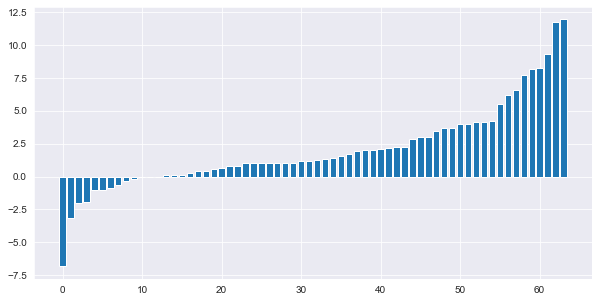

In [72]:
importance=np.sort(slope)
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

----

Dari 4 model prediksi telah dibuat, model SVR memberikan nilai error terkecil dibandingkan model lain sebesar 21.36% (walaupun masih tergolong besar untuk model prediksi). Dilakukan modelling ulang dengan hyperparameter tuning pada model SVR didapatkan parameter terbaik yaitu :

*> {'svr__C': 10, 'svr__epsilon': 15, 'svr__gamma': 5}*

Setelah hyperparameter tuning, ternyata error yang dihasilkan lebih besar dan model lebih overfitting. Maka dari itu diputuskan untuk menggunakan model SVR dengan hyperparameter default.

Pada analisis ini sudah digunakan 4 model dan 1 model dengan hyperparameter tuning namun masih belum bisa memberikan prediksi popularitas dengan baik. Solusi awal bisa dengan mencoba model-model regresi lain yang belum dilatih, atau mencoba lagi untuk mencari hyperparameter yang tepat pada setiap model untuk mengurangi nilai error.

Data-data teknis tentang suara pada lagu-lagu populer ternyata tidak terlalu bisa digunakan untuk memprediksi nilai popularitas sebuah lagu. Setidaknya dengan menyesuaikan beberapa angka teknis dalam pembuatan lagu, kita bisa sedikit memprediksi berapa nilai popularitas didapat dengan error sebesar 21%. Bila ada data scoring untuk melodi dan lirik bisa jadi menambah akurasi model dalam memprediksi popularitas.

---

----------
----------